In [158]:
import matplotlib.pyplot as plt
import copy
import numpy as np
import random

len = 100
nodes = 600
time = 4

deltaX = len/nodes
alpha = 110
deltaT = 0.1 * deltaX**2/alpha

t_nodes = int(time/deltaT)

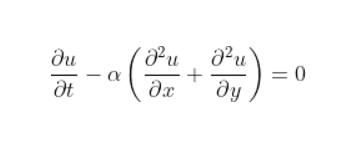

For now, consider the 1D heat equation of finite length.

In [159]:
box = []

def randomBox():
  for i in range(0, nodes):
    box.insert(i, 60*random.random())

def randomWalkedBox():
  box.insert(0, np.random.random())
  
  for i in range(1, nodes):
    box.insert(i, box[i-1] + 15*(random.random() - 0.5)) 


def step():
  for i in range(500):
    dup = copy.deepcopy(box)

    for j in range(1, nodes - 1):
      box[j] = alpha * deltaT * (dup[j - 1] - 2 * dup[j] + dup[j + 1]) / deltaX ** 2 + dup[j]

  # box[0] = box[1]
  # box[-1] = box[-2]
  
  return box


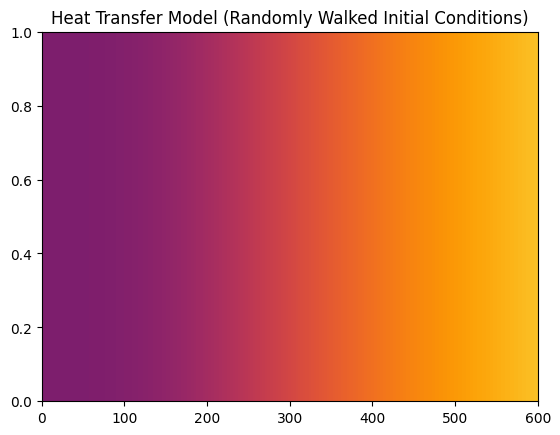

In [160]:
from matplotlib.animation import PillowWriter

fig, ax = plt.subplots()

box = []
randomWalkedBox()

ax.set_title("Heat Transfer Model (Randomly Walked Initial Conditions)")
pcm = ax.pcolormesh([box], cmap="inferno")

metadata = dict(title="Heat Transfer Animation", artist="Matthew G")
writer = PillowWriter(fps=45, metadata=metadata)

with writer.saving(fig, "heatTransfer4.gif", 100):
  for i in range(200):
    pcm.set_array([step()])
    
    writer.grab_frame()
    
  